# I found an interesting tweet that led me to a post on LinkedIn that described an "Interview Kit" for data jobs (i.e. Data Scientist, Data Analyst, etc.). Since I've been working on a career change to the world of data, I want to take on this challenge. If nothing else, it'll be good practice for me, in a "real world" type of setting. 

## Important References:
LinkedIn Post: [Click Here](https://www.linkedin.com/pulse/how-hire-test-data-skills-one-size-fits-all-interview-tanya-cashorali/)

* **Questions to Answer**
    1. Which brewery produces the strongest beers by ABV%?
    - If you had to pick 3 beers to recommend using only this data, which would you pick?
    - Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?
    - Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

In [1]:
# The usual imports for exploratory data analyses
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_raw = pd.read_csv('./beer_reviews.csv')

In [4]:
df_raw.shape

(1586614, 13)

In [5]:
df_raw.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [6]:
df_raw.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [7]:
df_raw.head(10)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


In [8]:
df_raw[df_raw['beer_abv'].isnull()]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
273,1075,Caldera Brewing Company,1103668195,3.0,3.0,3.0,RedDiamond,American Stout,4.0,3.0,Cauldron Espresso Stout,NaN,21241
430,850,Moon River Brewing Company,1110736110,3.5,4.0,4.5,cMonkey,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
603,850,Moon River Brewing Company,1100038819,4.0,3.5,4.0,aracauna,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
733,1075,Caldera Brewing Company,1260673921,4.0,4.0,4.0,plaid75,American IPA,4.0,4.0,Alpha Beta,NaN,54723
798,1075,Caldera Brewing Company,1212201268,4.5,4.5,4.0,grumpy,American Double / Imperial Stout,4.0,4.5,Imperial Stout,NaN,42964
927,2724,Pacific Coast Brewing Company,1293559076,1.0,1.5,3.0,womencantsail,American Strong Ale,2.5,1.5,Megalodon,NaN,64803
944,2724,Pacific Coast Brewing Company,1205614154,1.5,2.0,1.5,JDV,Belgian Strong Pale Ale,1.0,3.0,Holiday Trappist Style Ale,NaN,41584
960,2724,Pacific Coast Brewing Company,1215743407,4.0,3.5,4.0,hoegaardenhero,American Amber / Red Ale,4.5,3.5,Emerald Ale,NaN,37498
961,2724,Pacific Coast Brewing Company,1203379699,4.0,4.0,4.0,barleywinefiend,American Amber / Red Ale,4.0,4.0,Emerald Ale,NaN,37498
962,2724,Pacific Coast Brewing Company,1183260774,4.0,4.0,4.5,Mark,American Amber / Red Ale,4.5,4.0,Emerald Ale,NaN,37498


The first question (brewery that produces strongest beers by ABV) is somewhat open to interpretation. I could simply reorder the list by the ABV column and pick the highest one. However, that doesn't necessarily answer the question in full. My approach will be to group the data by brewery and abv, and choose a brewery based on a 3-beer average of their highest ABV beers. That seems like a reasonable approach for now. First, let's find the brewery with the single highest ABV beer. 

In [9]:
df_raw['beer_abv'].idxmax()

12919

In [11]:
df_raw.iloc[12919]

brewery_id                                     6513
brewery_name                           Schorschbräu
review_time                              1316780901
review_overall                                    4
review_aroma                                      4
review_appearance                                 4
review_profilename                      kappldav123
beer_style                                  Eisbock
review_palate                                     4
review_taste                                    3.5
beer_name             Schorschbräu Schorschbock 57%
beer_abv                                       57.7
beer_beerid                                   73368
Name: 12919, dtype: object

### If we chose the brewery that produces the highest ABV beer, that would be Schorschbr&auml;u. Their Schorschbock has an astounding 57.7% ABV. I wonder if that's a typo? The limits of fermentation are about 15% ABV. I know that some breweries have tricks up their sleeves (barrel aging, fortifying, etc.) to increase ABV, but 114 proof seems excessive. Let's do a quick histogram of the ABV column, to see where most values fall. 

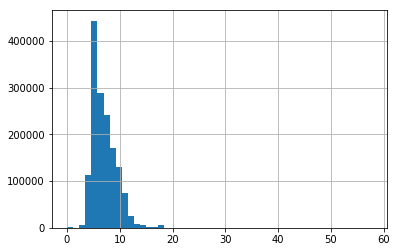

In [13]:
df_raw['beer_abv'].hist(bins=50)

### The histogram is in line with what I would expect for beer ABV. Let's do one more check to see what's going on with this beer / brewery. Below, I'll select the rows for beers that are above 16% ABV, so I can see how many there are in this dataset. 

In [19]:
df_raw[df_raw['beer_abv'] > 16.]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
12918,6513,Schorschbräu,1248785936,3.5,4.0,4.0,kappldav123,Eisbock,4.0,4.5,Schorschbräu Schorschbock 31%,30.86,51466
12919,6513,Schorschbräu,1316780901,4.0,4.0,4.0,kappldav123,Eisbock,4.0,3.5,Schorschbräu Schorschbock 57%,57.70,73368
12934,6513,Schorschbräu,1264684153,4.0,4.5,4.5,kappldav123,Eisbock,4.0,4.5,Schorschbräu Schorschbock 40%,39.44,55712
12939,6513,Schorschbräu,1309974178,4.0,4.0,3.5,Sunnanek,Eisbock,4.0,4.0,Schorschbräu Schorschbock 43%,43.00,57856
12940,6513,Schorschbräu,1274469798,3.5,4.0,4.0,kappldav123,Eisbock,4.0,4.5,Schorschbräu Schorschbock 43%,43.00,57856
12941,6513,Schorschbräu,1321041551,3.0,3.0,3.0,orangesol,Eisbock,2.0,3.0,Schorschbräu Schorschbock 40%,39.44,55712
12942,6513,Schorschbräu,1274645294,3.0,3.5,3.5,thepeter,Eisbock,3.5,3.5,Schorschbräu Schorschbock 40%,39.44,55712
58570,16866,The Bruery,1272411308,3.0,4.5,4.5,emmasdad,American Double / Imperial Stout,4.0,4.0,Black Tuesday,18.20,51257
58590,16866,The Bruery,1293874121,3.5,5.0,4.5,JoeySchlitz,American Double / Imperial Stout,4.5,4.5,Black Tuesday,18.20,51257
58615,16866,The Bruery,1287881063,4.0,4.5,4.0,boralyl,American Double / Imperial Stout,4.5,4.0,Black Tuesday,18.20,51257


### Well well well - I wasn't expecting that. As it turns out, the 57.7% is not a typo. There appears to be a brewery that produces some insanely powerful beer. After a quick search with your favorite search engine, you'll also see that this brewery does exist and does produce several extremely potent brews. I think I can confidently close the book on question #1! 

## Running Results:
* **Questions to Answer**
    1. Which brewery produces the strongest beers by ABV%?
        * **A: Schorschbr&auml;u**
    - If you had to pick 3 beers to recommend using only this data, which would you pick?
    - Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?
    - Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

The next question won't be quite so simple to solve, but that's why I love this field so much. The digging into data is - dare I say? - fun!

In [20]:
# First, let's try sorting by overall review score. 
df_raw.sort_values(by='review_overall', ascending=0)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
793307,579,Kona Brewing Co.,1293809208,5.0,2.5,3.0,vfgccp,American Pale Ale (APA),4.0,3.5,Fire Rock Pale Ale,5.8,5753
591801,1549,Goose Island Beer Co.,1180667386,5.0,5.0,4.5,bort11,American Double / Imperial Stout,5.0,4.5,Bourbon County Brand Stout,14.5,10672
591818,1549,Goose Island Beer Co.,1175185922,5.0,5.0,5.0,Beezor,American Double / Imperial Stout,4.5,5.0,Bourbon County Brand Stout,14.5,10672
591819,1549,Goose Island Beer Co.,1175135314,5.0,4.5,4.0,zeff80,American Double / Imperial Stout,4.5,5.0,Bourbon County Brand Stout,14.5,10672
591824,1549,Goose Island Beer Co.,1173843941,5.0,4.5,3.5,klewis,American Double / Imperial Stout,5.0,5.0,Bourbon County Brand Stout,14.5,10672
591829,1549,Goose Island Beer Co.,1172770590,5.0,5.0,4.5,brewdlyhooked13,American Double / Imperial Stout,5.0,5.0,Bourbon County Brand Stout,14.5,10672
591835,1549,Goose Island Beer Co.,1172016109,5.0,4.5,4.0,BWH3,American Double / Imperial Stout,4.0,4.5,Bourbon County Brand Stout,14.5,10672
591848,1549,Goose Island Beer Co.,1168918070,5.0,4.5,4.0,Westsidethreat,American Double / Imperial Stout,5.0,5.0,Bourbon County Brand Stout,14.5,10672
591853,1549,Goose Island Beer Co.,1168198569,5.0,5.0,3.0,kimcgolf,American Double / Imperial Stout,4.0,4.0,Bourbon County Brand Stout,14.5,10672
591860,1549,Goose Island Beer Co.,1167375574,5.0,4.5,4.5,Zorro,American Double / Imperial Stout,5.0,5.0,Bourbon County Brand Stout,14.5,10672


In [22]:
df_raw['review_profilename'].value_counts()

northyorksammy     5817
BuckeyeNation      4661
mikesgroove        4617
Thorpe429          3518
womencantsail      3497
NeroFiddled        3488
ChainGangGuy       3471
brentk56           3357
Phyl21ca           3179
WesWes             3168
oberon             3128
feloniousmonk      3081
akorsak            3010
BEERchitect        2946
Gueuzedude         2938
jwc215             2735
russpowell         2696
TheManiacalOne     2659
Gavage             2630
zeff80             2622
Mora2000           2594
tempest            2559
Wasatch            2541
WVbeergeek         2524
drabmuh            2481
Halcyondays        2457
weeare138          2452
glid02             2450
Viggo              2433
ppoitras           2426
                   ... 
jjboyd                1
Kmiller565            1
phisherman11946       1
HarryRamsbottom       1
bumpqua               1
JWNeeley              1
lifeguardjon          1
stowehop              1
theHarv               1
paciu81               1
Nolan           

We can see that there are many reviewers with only 1 review. Perhaps I should omit their opinions? I won't be that rash just yet, but perhaps it would make sense to weed out beers with only one review. That could color the results. I think, in order to recommend the top 3 beers, they should be beers with a reasonably large number of reviews. 

In [33]:
df_raw['beer_beerid'].value_counts()

2093     3290
412      3111
1904     3000
1093     2728
92       2704
4083     2704
276      2587
88       2575
7971     2527
11757    2502
2671     2492
34       2483
6108     2475
1013     2452
695      2450
680      2447
17112    2443
104      2418
1160     2329
1005     2302
73       2257
355      2234
1708     2217
754      2210
645      2170
131      2070
30420    2029
571      2025
2512     2009
731      1981
         ... 
30317       1
56576       1
54529       1
52482       1
25192       1
31339       1
17004       1
39176       1
31650       1
29603       1
22481       1
32021       1
5400        1
57976       1
24528       1
33396       1
17317       1
9502        1
45682       1
73017       1
43633       1
41584       1
75070       1
77119       1
53505       1
51458       1
49411       1
61701       1
21102       1
62143       1
Name: beer_beerid, Length: 66055, dtype: int64

In [51]:
df_raw.groupby(['beer_beerid', 'brewery_name']).mean().sort_values(by='review_overall', ascending=0).shape

(66044, 8)

Perhaps I can apply the Frank Kane recommender project from the data science class I took. Other than that, I'm on the right track, just need to clean things up a little

Well, I found my movie ratings / recommendation example from the Frank Kane Data Science class I took on Udemy. I might be able to adapt it to this dataset without too much trouble. First task (I think) will be to aggregate (probably by average, but summing the ratings has merit too) the ratings a beer got, and drop that into a new column. 

In [52]:
df_raw.head(10)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


In [53]:
df_raw['review_agg'] = df_raw.review_overall + df_raw.review_aroma + df_raw.review_appearance + df_raw.review_palate + df_raw.review_taste

In [56]:
df_raw.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,review_agg
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04,1.892942e+01
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04,2.911932e+00
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00,5.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03,1.750000e+01
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04,1.950000e+01
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04,2.100000e+01
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04,2.500000e+01


OK, I decided to sum the review categories instead of average them. The logic being that if a beer gets 5's across the board, it must be excellent. Going forward with the recommender, I'm going to create a new dataframe and strip out a lot of these columns, leaving only the aggregated review, reviewer, and beerid. I can then cross-reference back to the original dataframe once I have found the top beerids to recommend. 

In [57]:
columns = ['beer_beerid', 'review_profilename', 'review_agg']
beer_rec = df_raw[columns]
beer_rec.head()

,beer_beerid,review_profilename,review_agg
0,47986,stcules,9.0
1,48213,stcules,14.5
2,48215,stcules,14.5
3,47969,stcules,15.0
4,64883,johnmichaelsen,21.0


In [58]:
ratings_pivot = beer_rec.pivot_table(index=['review_profilename'], columns=['beer_beerid'], values='review_agg')
ratings_pivot.head()

beer_beerid,3,4,5,6,7,8,9,10,11,12,...,77307,77308,77309,77310,77312,77313,77314,77315,77316,77317
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02maxima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03SVTCobra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df_raw[df_raw['beer_name'].str.contains('30th St.')].shape

(32, 14)

In [72]:
df_raw[df_raw['beer_name'].str.contains('30th St.')]['beer_name'].iloc[0]

'30th Street Pale Ale'

In [76]:
df_raw[df_raw['beer_name'].str.contains('30th St.')]['beer_beerid'].iloc[0]

47244

I have decided to run the recommendation engine with one of my all-time favorite beers as the input. Using some string munging in pandas, I found that this beer does exist in the database, and it's id is '47244'. Using that, I can create similarity scores in pandas using corrwith(). My plan for recommending 3 beers from this vast list is as follows:
1. Using a personal favorite, find beers that are most similarly rated
- Of the most similarly rated beers, choose 3 out of the top 10 that of different styles (variety is the spice of life!)
- Be careful to avoid beers with few reviews, the tough part is finding that low threshold of reviews to weed out. 

In [79]:
gf_30th_ratings = ratings_pivot[47244]
gf_30th_ratings.head()

review_profilename
0110x011      NaN
01Ryan10      NaN
02maxima      NaN
03SVTCobra    NaN
04101Brewer   NaN
Name: 47244, dtype: float64

In [80]:
similar_beers = ratings_pivot.corrwith(gf_30th_ratings)
similar_beers.dropna()
similar_beers_df = pd.DataFrame(similar_beers)
similar_beers_df.head(10)

/Users/charlierock/anaconda/envs/py35/lib/python3.6/site-packages/numpy/lib/function_base.py:3154: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/charlierock/anaconda/envs/py35/lib/python3.6/site-packages/numpy/lib/function_base.py:3088: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,0
beer_beerid,
3,NaN
4,NaN
5,-0.775315
6,-0.631295
7,-0.172421
8,NaN
9,NaN
10,-0.294009
11,NaN


### One thing I'm worried about is whether my aggregate rating is ignoring the nuances of the individual review categories? At some point, however, you have to pick a rubric and stick to it. I suppose I can address the shortcomings in the later questions, which dive into the specific review catergories. 

In [112]:
similar_beers.dropna(inplace=True)

In [86]:
similar_beers_df.dropna(inplace=True)

In [87]:
similar_beers_df.shape

(4802, 1)

In [89]:
# Now to sort the values, based on similarity score
similar_beers_df.sort_values(by=0,ascending=False)

,0
beer_beerid,
55418,1.0
37653,1.0
43145,1.0
15019,1.0
68758,1.0
68858,1.0
1525,1.0
37639,1.0
37654,1.0


### Well, there are a lot of beers with a perfect correlation score. I need to do some work, in order to clean up this list. I'll start by removing beers with very few ratings. Here we go!

In [90]:
beer_stats = beer_rec.groupby('beer_beerid').agg({'review_agg': [np.size, np.mean]})
beer_stats.head()

review_agg           
                  size       mean
beer_beerid                      
3                  3.0  20.333333
4                 10.0  18.600000
5                424.0  16.899764
6                877.0  18.217788
7                659.0  15.905159

In [94]:
beer_stats.describe()

review_agg              
               size          mean
count  66055.000000  66055.000000
mean      24.019590     18.071333
std      110.864191      2.604445
min        1.000000      5.000000
25%        1.000000     16.833333
50%        2.000000     18.500000
75%        7.000000     19.875000
max     3290.000000     25.000000

It appears that the average number of ratings a beer has is 24, with a really high standard deviation. I could remove beers with fewer than 50 ratings and re-run my similarity score. After that, I can play with the cutoff to optimize my results. 

In [129]:
popular_beers = beer_stats['review_agg']['size'] >= 500
beer_stats[popular_beers].sort_values([('review_agg', 'mean')], ascending=False)[:15]

review_agg           
                  size       mean
beer_beerid                      
21690            610.0  23.143443
1545            1272.0  23.007075
47658            637.0  22.883046
7971            2527.0  22.673130
34420           1412.0  22.588881
19960           1932.0  22.451087
857              707.0  22.404526
22227           1053.0  22.097816
645             2170.0  22.077419
33127            646.0  22.054954
41815            595.0  22.040336
11757           2502.0  22.020184
6368             662.0  21.993958
17112           2443.0  21.986083
46849            563.0  21.924512

In [132]:
print(beer_stats[popular_beers].shape)
print(similar_beers.shape)
print(beer_rec_trimmed.shape)
similar_beers.isnull().sum()

(591, 2)
(4802,)
(591, 3)


0

In [131]:
beer_rec_trimmed = beer_stats[popular_beers].join(pd.DataFrame(similar_beers, columns=['similarity']))

/Users/charlierock/anaconda/envs/py35/lib/python3.6/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [133]:
beer_rec_trimmed.head(10)

,"(review_agg, size)","(review_agg, mean)",similarity
beer_beerid,,,
6,877.0,18.217788,-0.631295
7,659.0,15.905159,-0.172421
10,717.0,19.022315,-0.294009
17,753.0,16.334661,-0.507467
19,590.0,20.327119,0.891042
30,1736.0,20.728399,0.107179
31,941.0,19.210414,0.163657
33,1730.0,20.658671,-0.181269
34,2483.0,21.384414,0.522112


In [140]:
beer_rec_trimmed.sort_values(['similarity'], ascending=False)[:15]

,"(review_agg, size)","(review_agg, mean)",similarity
beer_beerid,,,
1924,696.0,19.216954,1.000000
3824,588.0,17.335034,1.000000
48050,514.0,20.062257,0.997241
15216,600.0,16.270000,0.987829
100,633.0,15.583728,0.987058
74,741.0,17.935223,0.986440
1079,513.0,17.061404,0.984324
18721,536.0,19.526119,0.954618
6322,1052.0,20.229563,0.949669


In [155]:
# Convert the index into a list for use when searching raw dataframe.
rec_beer_ids = beer_rec_trimmed.sort_values(['similarity'], ascending=False)[:15].index.tolist()

I should first check into the error / warning I got, but then I should go back and up my minimum cutoff for review quantity. Let's try 100 reviews and see where that goes. Possibly could go really high with the cutoff. After verifying that my code is correct (per previous class tutorial), I played around with the cutoff amount for reviews. I jumped up from 50 to 100 to 1000 before settling on 500 reviews. That allows a good amount of beers through, while ensuring that there is some variety in similarity scores. Now, let's see what these beers are! 

In [156]:
rec_beer_ids

[1924,
 3824,
 48050,
 15216,
 100,
 74,
 1079,
 18721,
 6322,
 3635,
 1276,
 4073,
 19,
 2758,
 694]

In [188]:
rec_beer_names = df_raw[df_raw.beer_beerid.isin(rec_beer_ids)]['beer_name'].unique().tolist()
rec_breweries = df_raw[df_raw.beer_beerid.isin(rec_beer_ids)]['brewery_name'].unique().tolist()
rec_beer_df = pd.DataFrame({'beer_beerid':rec_beer_ids, 'beer_name':rec_beer_names})

In [180]:
beers_ids_sim = beer_rec_trimmed.sort_values(['similarity'], ascending=False)[:15].reset_index()

In [181]:
beers_ids_sim

,beer_beerid,"(review_agg, size)","(review_agg, mean)",similarity
0,1924,696.0,19.216954,1.000000
1,3824,588.0,17.335034,1.000000
2,48050,514.0,20.062257,0.997241
3,15216,600.0,16.270000,0.987829
4,100,633.0,15.583728,0.987058
5,74,741.0,17.935223,0.986440
6,1079,513.0,17.061404,0.984324
7,18721,536.0,19.526119,0.954618
8,6322,1052.0,20.229563,0.949669
9,3635,813.0,20.577491,0.922484


In [182]:
rec_beer_df = pd.merge(rec_beer_df, beers_ids_sim, on='beer_beerid')
rec_beer_df

,beer_beerid,beer_name,"(review_agg, size)","(review_agg, mean)",similarity
0,1924,Founders Pale Ale,696.0,19.216954,1.000000
1,3824,Monty Python's Holy Grail Ale,588.0,17.335034,1.000000
2,48050,Sinebrychoff Porter,514.0,20.062257,0.997241
3,15216,Samuel Adams Hefeweizen,600.0,16.270000,0.987829
4,100,Don de Dieu,633.0,15.583728,0.987058
5,74,Blue Moon Harvest Moon Pumpkin Ale,741.0,17.935223,0.986440
6,1079,Coors,513.0,17.061404,0.984324
7,18721,La Terrible,536.0,19.526119,0.954618
8,6322,Tröegs Hopback Amber Ale,1052.0,20.229563,0.949669
9,3635,Cascazilla,813.0,20.577491,0.922484


In [187]:
df_raw[df_raw.beer_name.isin(['Cascazilla', 'Monty Python\'s Holy Grail Ale', 'Don de Dieu', 'Shelter Pale Ale'])]['brewery_name'].unique()

array(['Black Sheep Brewery PLC', 'Unibroue', 'Ithaca Beer Company',
       'Dogfish Head Brewery'], dtype=object)

### OMG, that was a lot of work to collect my preliminary results, but at least I learned a little more about merging and other dataframe operations. I couldn't pull in the brewery names, but most of them can be inferred. I'll choose 3 beers from this list as my recommendations. Here they are:
1. Founders Pale Ale (not only did it have the highest similarity score, I've heard of Founders and I like their beer)
- Ithaca Beer Company Cascazilla. It's an Amber/Red Ale, had a high aggregate score and has a cool name.
- Dogfish Head Shelter Pale Ale. This one should be easy to find, and matched well to my input beer. 

## Running Results:
* **Questions to Answer**
    1. Which brewery produces the strongest beers by ABV%?
        * **A: Schorschbr&auml;u**
    - If you had to pick 3 beers to recommend using only this data, which would you pick?
        * **A: See Cell Above**
    - Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?
    - Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

In [189]:
# On to question 3, let's look at the raw dataframe again. 
df_raw.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_agg
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,9.0
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,14.5
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,14.5
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,15.0
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,21.0


### Thoughts on question 3:
* I probably need to pull out just the columns with ratings data.
* I probably need to correlate the various factors with overall score to determine which has the highest correlation 
* This is very much in the world of Statistics. Time to dig up my 6Sigma class notes!
* Maybe a chart would help illustrate? 

In [213]:
rev_pattern = '[review_a+]+'
review_cols = df_raw.columns.str.match(rev_pattern).tolist()

In [219]:
review_df = df_raw.loc[:, review_cols]
review_df.drop(['review_time', 'review_profilename','review_agg'], axis=1, inplace=True)
review_df.head()

/Users/charlierock/anaconda/envs/py35/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,1.5,2.0,2.5,1.5,1.5
1,3.0,2.5,3.0,3.0,3.0
2,3.0,2.5,3.0,3.0,3.0
3,3.0,3.0,3.5,2.5,3.0
4,4.0,4.5,4.0,4.0,4.5


In [220]:
review_df.shape

(1586614, 5)

In [221]:
review_df.corr()

,review_overall,review_aroma,review_appearance,review_palate,review_taste
review_overall,1.000000,0.616013,0.501732,0.701914,0.789816
review_aroma,0.616013,1.000000,0.561029,0.616947,0.716776
review_appearance,0.501732,0.561029,1.000000,0.566634,0.546980
review_palate,0.701914,0.616947,0.566634,1.000000,0.734135
review_taste,0.789816,0.716776,0.546980,0.734135,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113ce8ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116fa0f98>]], dtype=object)

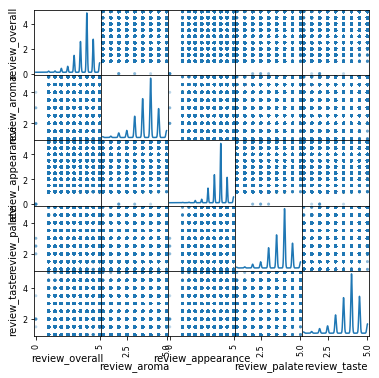

In [225]:
from pandas.plotting import scatter_matrix
scatter_matrix(review_df, alpha=0.3, figsize=(6,6), diagonal='kde')

In [227]:
sample = review_df[:1000]
sample.shape

(1000, 5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b4a9358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d1cf5f8>]], dtype=object)

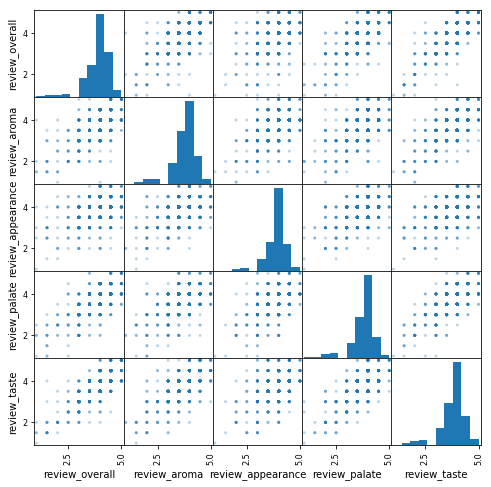

In [231]:
scatter_matrix(sample, alpha=0.3, figsize=(8,8))

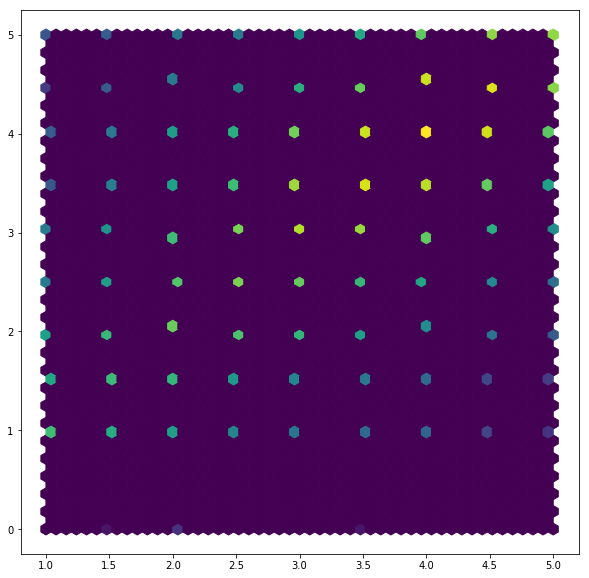

In [238]:
x = review_df['review_taste']
y = review_df['review_overall']
fig, ax = plt.subplots(figsize=(10,10))
plt.hexbin(x, y, gridsize=50, bins='log', cmap='viridis')

### Well, I'm spending a lot of time trying to come up with some fancy pants charts, when the .corr() function in pandas gave me my answer in almost no time at all. Based on Pearson correlation, Taste is the review attribute that is most correlated with the overall review (quality). Let's update the tote board:
## Running Results:
* **Questions to Answer**
    1. Which brewery produces the strongest beers by ABV%?
        * **A: Schorschbr&auml;u**
    - If you had to pick 3 beers to recommend using only this data, which would you pick?
        * **Founders Pale Ale** (not only did it have the highest similarity score, I've heard of Founders and I like their beer)
        * **Ithaca Beer Company Cascazilla** It's an Amber/Red Ale, had a high aggregate score and has a cool name.
        * **Dogfish Head Shelter Pale Ale** This one should be easy to find, and matched well to my input beer.
    - Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?
        * **Taste is most important when determining the overall quality**
    - Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

In order to answer this last question, I'll need to separate out the reviews for aroma and appearance, as well as the beer style column. Ranking these data by either aggregate or mean scores should give me a good idea as to what beer type to suggest. Let's see how it goes. 

In [239]:
df_raw.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_agg
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,9.0
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,14.5
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,14.5
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,15.0
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,21.0


In [247]:
cols4 = ['review_aroma', 'review_appearance', 'beer_style']
df_q4 = df_raw[cols4]
df_q4.head()

,review_aroma,review_appearance,beer_style
0,2.0,2.5,Hefeweizen
1,2.5,3.0,English Strong Ale
2,2.5,3.0,Foreign / Export Stout
3,3.0,3.5,German Pilsener
4,4.5,4.0,American Double / Imperial IPA


In [244]:
df_q4.groupby('beer_style')[['review_aroma', 'review_appearance']].mean().sort_values(by='review_aroma', ascending=False)[:10]

,review_aroma,review_appearance
beer_style,,
American Double / Imperial Stout,4.160665,4.163633
Eisbock,4.156778,3.964514
Quadrupel (Quad),4.132533,4.117964
American Wild Ale,4.126756,4.005451
Lambic - Unblended,4.118043,3.912478
Gueuze,4.117574,4.034864
American Double / Imperial IPA,4.097782,4.078916
Russian Imperial Stout,4.076576,4.210072
Weizenbock,4.044677,4.009297


In [245]:
df_q4.groupby('beer_style')[['review_aroma', 'review_appearance']].mean().sort_values(by='review_appearance', ascending=False)[:10]

,review_aroma,review_appearance
beer_style,,
Russian Imperial Stout,4.076576,4.210072
American Double / Imperial Stout,4.160665,4.163633
Quadrupel (Quad),4.132533,4.117964
American Black Ale,3.930456,4.112922
American Double / Imperial IPA,4.097782,4.078916
Belgian IPA,3.979753,4.075214
Bière de Champagne / Bière Brut,3.734704,4.045889
Baltic Porter,3.946379,4.039535
Foreign / Export Stout,3.828366,4.039015


### Ranking the beer styles yields some interesting results. It seems that when it comes to appearance, dark beers rise to the top. However, when it comes to aroma, many different beer styles appear in the top 10, including several sour/wild ales. This makes sense to me, as aroma is largely a matter of preference. Some folks like the pungent tang of sour beers, some like the bright bitterness of hop-laden varieties, and some like the deep malty aroma of a Stout. That all being said, I have to answer the question, don't I? Seeing as it ranked #1 in aroma and #2 in appearance, I would recommend an American Double / Imperial Stout if aroma and appearance were most important to you. Though, if you were feeling particularly adventurous - a Quadrupel (#3 on both lists) is always a nice option - just don't have too many unless you want to become the most popular person at karaoke! 

## Results Summary:
* **Questions to Answer**
    1. Which brewery produces the strongest beers by ABV%?
        * **A: Schorschbr&auml;u**
    - If you had to pick 3 beers to recommend using only this data, which would you pick?
        * **Founders Pale Ale** (not only did it have the highest similarity score, I've heard of Founders and I like their beer)
        * **Ithaca Beer Company Cascazilla** It's an Amber/Red Ale, had a high aggregate score and has a cool name.
        * **Dogfish Head Shelter Pale Ale** This one should be easy to find, and matched well to my input beer.
    - Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?
        * **A: Taste is most important when determining the overall quality**
    - Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?
        * **A: American Double / Imperial Stout** (Quadrupel for the adventurous folks!)